# Iris dataset analysis and SVM



In [104]:

#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [105]:
d_iris = load_iris()

In [106]:
d_iris.feature_names #show feature names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [107]:
d_iris.target_names #show target names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [108]:
d_iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [109]:
iris = pd.DataFrame(d_iris.data,columns=d_iris.feature_names)

iris['target'] = d_iris.target

In [110]:
iris.info()  #checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [111]:
iris.head(20)  #show the first 20 rows from the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Some Exploratory Data Analysis With Iris

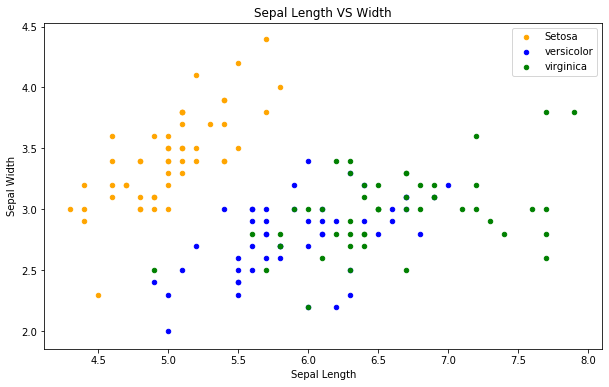

In [112]:
fig = iris[iris.target==0].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='orange', label='Setosa')
iris[iris.target==1].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='blue', label='versicolor',ax=fig)
iris[iris.target==2].plot(kind='scatter',x='sepal length (cm)',y='sepal width (cm)',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

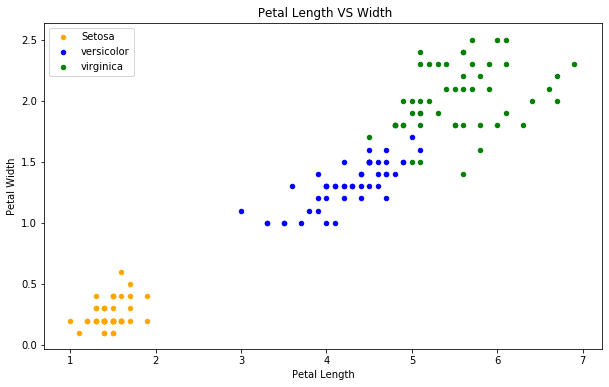

In [113]:
fig = iris[iris.target==0].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='orange', label='Setosa')
iris[iris.target==1].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='blue', label='versicolor',ax=fig)
iris[iris.target==2].plot.scatter(x='petal length (cm)',y='petal width (cm)',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal.

### Now let us see how are the length and width are distributed

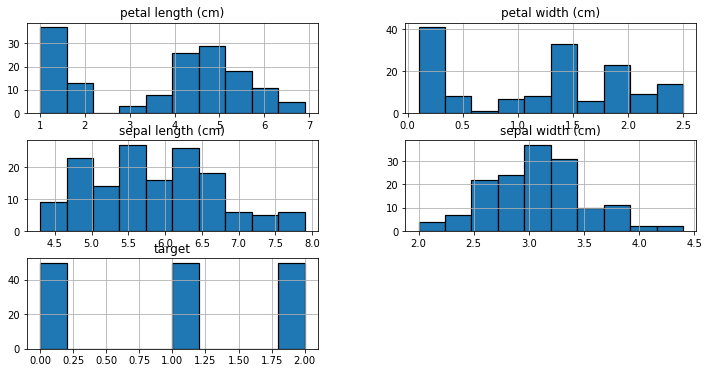

In [114]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### Now let us see how the length and width vary according to the species

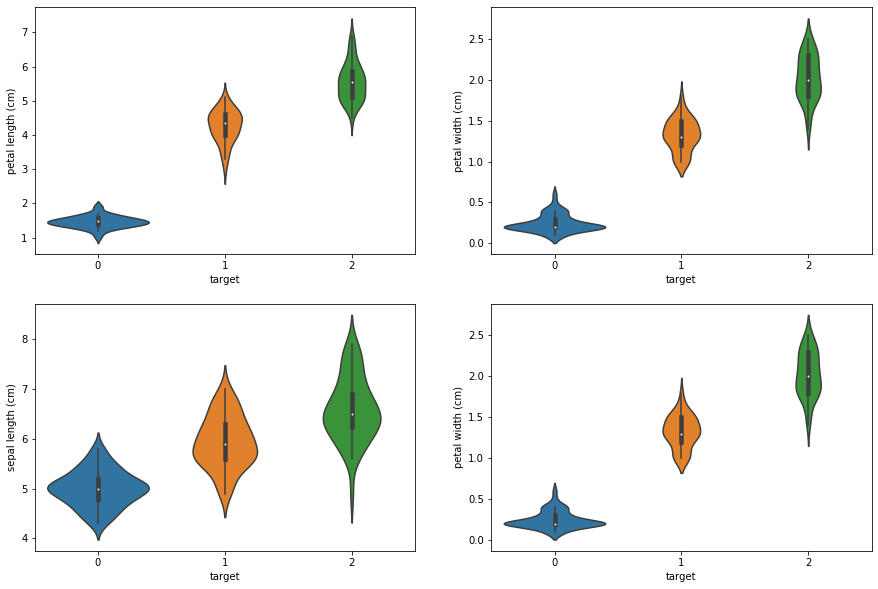

In [115]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='target',y='petal length (cm)',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='target',y='petal width (cm)',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='target',y='sepal length (cm)',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='target',y='petal width (cm)',data=iris)

The violinplot shows density of the length and width in the target (species). The thinner part denotes that there is less density whereas the fatter part conveys higher density

### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.
**Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data



Before we start, we need to clear some ML notations.

**attributes**-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as **Features**.

**Target variable**, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [116]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy


In [117]:
iris.shape #get the shape of the dataset

(150, 5)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

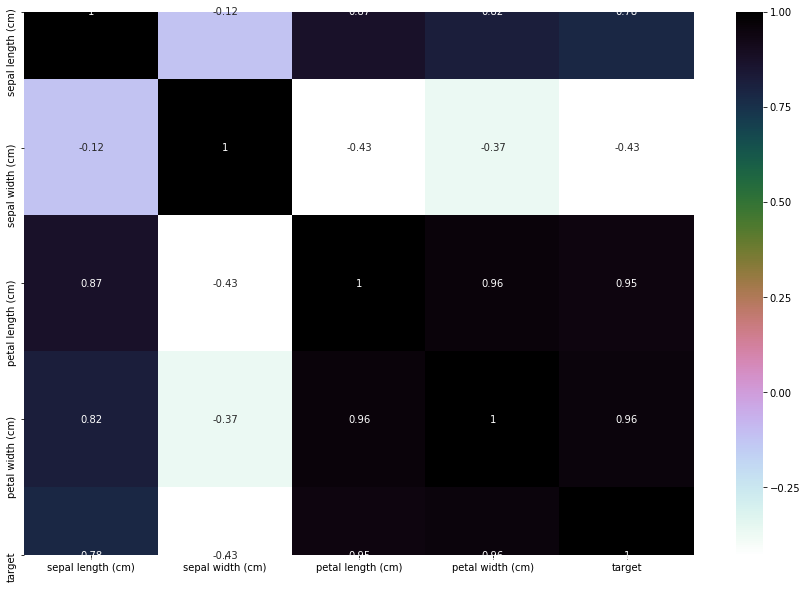

In [118]:
plt.figure(figsize=(15,10)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') 
#draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()


**Observation--->**

The Sepal Width and Length are not correlated
The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

In [119]:
df0 = iris[iris.target==0]
df1 = iris[iris.target==1]
df2 = iris[iris.target==2]

## We need classafication only on two first classes

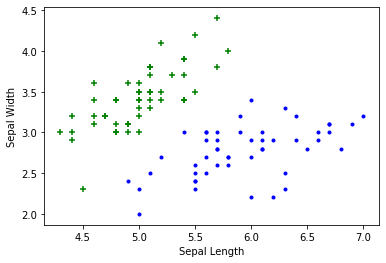

In [120]:
%matplotlib inline
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

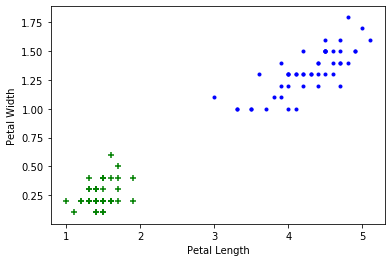

In [121]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

### Steps To Be followed When Applying an Algorithm

 1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
 2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
 3. Then pass the training dataset to the algorithm to train it. We use the **.fit()** method
 4. Then pass the testing data to the trained algorithm to predict the outcome. We use the **.predict()** method.
 5. We then check the accuracy by **passing the predicted outcome and the actual output** to the model.

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
options = ['0', '1'] 
df_0_1 = iris[iris["target"].isin(options)]

In [124]:
X = df_0_1.drop(['target'], axis='columns')
y = df_0_1.target

### Splitting The Data into Training And Testing Dataset

In [125]:
X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [126]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int32

In [127]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # in this our main data is split into train and test
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%

Lets check the Train and Test Dataset

In [128]:
len(X_train)

80

In [129]:
len(X_test)

20

### Support Vector Machine (SVM)

### Linear Kernel

In [130]:
from sklearn.svm import SVC
model = SVC(kernel="linear",gamma="auto") #select the algorithm

In [131]:
model.fit(X_train, y_train)  # we train the algorithm with the training data and the training output

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [132]:
model.score(X_test, y_test) # score on tesitng data

1.0

##### The accuracy of the linear SVM is: 1.0

In [133]:
model.get_params('true') # get the model parameters

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [134]:
model.support_vectors_  # get spport vectors

array([[4.5, 2.3, 1.3, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 2.5, 3. , 1.1]])

In [135]:
model.dual_coef_ # model y_i α_i

array([[-0.0772484 , -0.67051858,  0.74776699]])

In [136]:
model.intercept_  # independent term

array([-1.45376656])

# Export  model code with porter

In [137]:
from sklearn_porter import Porter

## Java

In [138]:
porter = Porter(model, language='java')
output = porter.export(embed_data=True)
print(output)

class SVC {

    private enum Kernel { LINEAR, POLY, RBF, SIGMOID }

    private int nClasses;
    private int nRows;
    private int[] classes;
    private double[][] vectors;
    private double[][] coefficients;
    private double[] intercepts;
    private int[] weights;
    private Kernel kernel;
    private double gamma;
    private double coef0;
    private double degree;

    public SVC (int nClasses, int nRows, double[][] vectors, double[][] coefficients, double[] intercepts, int[] weights, String kernel, double gamma, double coef0, double degree) {
        this.nClasses = nClasses;
        this.classes = new int[nClasses];
        for (int i = 0; i < nClasses; i++) {
            this.classes[i] = i;
        }
        this.nRows = nRows;

        this.vectors = vectors;
        this.coefficients = coefficients;
        this.intercepts = intercepts;
        this.weights = weights;

        this.kernel = Kernel.valueOf(kernel.toUpperCase());
        this.gamma = gamma;
        thi

## C

In [139]:
porter = Porter(model, language='c')
output = porter.export(embed_data=True)
print(output)

#include <stdlib.h>
#include <stdio.h>
#include <math.h>

#define N_FEATURES 4
#define N_CLASSES 2
#define N_VECTORS 3
#define N_ROWS 2
#define N_COEFFICIENTS 1
#define N_INTERCEPTS 1
#define KERNEL_TYPE 'l'
#define KERNEL_GAMMA 0.25
#define KERNEL_COEF 0.0
#define KERNEL_DEGREE 3

double vectors[3][4] = {{4.5, 2.3, 1.3, 0.3}, {5.1, 3.3, 1.7, 0.5}, {5.1, 2.5, 3.0, 1.1}};
double coefficients[1][3] = {{-0.07724840262003278, -0.6705185831514366, 0.7477669857714694}};
double intercepts[1] = {1.453766563649063};
int weights[2] = {2, 1};

int predict (double features[]) {
    int i, j, k, d, l;

    double kernels[N_VECTORS];
    double kernel;
    switch (KERNEL_TYPE) {
        case 'l':
            // <x,x'>
            for (i = 0; i < N_VECTORS; i++) {
                kernel = 0.;
                for (j = 0; j < N_FEATURES; j++) {
                    kernel += vectors[i][j] * features[j];
                }
                kernels[i] = kernel;
            }
            break;
        case 

### Poly Kernel

In [140]:
poly_model = SVC(kernel="poly",gamma="auto") #select the algorithm

In [141]:
poly_model.fit(X_train, y_train)  # we train the algorithm with the training data and the training output

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [142]:
poly_model.score(X_test, y_test) # score on tesitng data

1.0

##### The accuracy of the poly SVM is: 1.0

In [143]:
poly_model.get_params('true') # get the model parameters

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [144]:
poly_model.support_vectors_  # get spport vectors

array([[4.5, 2.3, 1.3, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [5.1, 2.5, 3. , 1.1]])

In [145]:
poly_model.dual_coef_ # model y_i α_i

array([[-0.00051006, -0.0088859 ,  0.00939596]])

In [146]:
poly_model.intercept_  # independent term

array([-1.13583882])

# Export  model code with porter

In [147]:
from sklearn_porter import Porter

## Java

In [148]:
porter = Porter(poly_model, language='java')
output = porter.export(embed_data=True)
print(output)

class SVC {

    private enum Kernel { LINEAR, POLY, RBF, SIGMOID }

    private int nClasses;
    private int nRows;
    private int[] classes;
    private double[][] vectors;
    private double[][] coefficients;
    private double[] intercepts;
    private int[] weights;
    private Kernel kernel;
    private double gamma;
    private double coef0;
    private double degree;

    public SVC (int nClasses, int nRows, double[][] vectors, double[][] coefficients, double[] intercepts, int[] weights, String kernel, double gamma, double coef0, double degree) {
        this.nClasses = nClasses;
        this.classes = new int[nClasses];
        for (int i = 0; i < nClasses; i++) {
            this.classes[i] = i;
        }
        this.nRows = nRows;

        this.vectors = vectors;
        this.coefficients = coefficients;
        this.intercepts = intercepts;
        this.weights = weights;

        this.kernel = Kernel.valueOf(kernel.toUpperCase());
        this.gamma = gamma;
        thi

## C

In [149]:
porter = Porter(poly_model, language='c')
output = porter.export(embed_data=True)
print(output)

#include <stdlib.h>
#include <stdio.h>
#include <math.h>

#define N_FEATURES 4
#define N_CLASSES 2
#define N_VECTORS 3
#define N_ROWS 2
#define N_COEFFICIENTS 1
#define N_INTERCEPTS 1
#define KERNEL_TYPE 'p'
#define KERNEL_GAMMA 0.25
#define KERNEL_COEF 0.0
#define KERNEL_DEGREE 3

double vectors[3][4] = {{4.5, 2.3, 1.3, 0.3}, {5.1, 3.3, 1.7, 0.5}, {5.1, 2.5, 3.0, 1.1}};
double coefficients[1][3] = {{-0.0005100630977269122, -0.008885899026071108, 0.009395962123798021}};
double intercepts[1] = {1.1358388232934824};
int weights[2] = {2, 1};

int predict (double features[]) {
    int i, j, k, d, l;

    double kernels[N_VECTORS];
    double kernel;
    switch (KERNEL_TYPE) {
        case 'l':
            // <x,x'>
            for (i = 0; i < N_VECTORS; i++) {
                kernel = 0.;
                for (j = 0; j < N_FEATURES; j++) {
                    kernel += vectors[i][j] * features[j];
                }
                kernels[i] = kernel;
            }
            break;
      